<a href="https://colab.research.google.com/github/Divesh-Kshirsagar/Seoul-Bike-Sharing-Demand-Predictor/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset
Seoul Bike Sharing Demand [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

## Variables
Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

This notebook is focused on predicting bike rental counts using various regression models. Here's a breakdown of its content:

    Dataset Information: It starts by describing the 'Seoul Bike Sharing Demand' dataset, detailing the variables included like date, bike count, hour, temperature, humidity, and more.
    Data Loading and Initial Preprocessing:
        It imports necessary libraries like pandas, numpy, matplotlib, imblearn, scikit-learn, seaborn, and tensorflow.
        The dataset is fetched from UCI Machine Learning Repository and loaded into a pandas DataFrame.
        Initial rows are displayed, and unnecessary columns (Date, Holiday, Seasons) are dropped.
        Column names are standardized, and the Functional Day column is converted to a numerical format.
        The data is filtered to include only entries for hour 12 (noon), and the hour column is then dropped.
    Exploratory Data Analysis (EDA):
        Scatter plots are generated to visualize the relationship between each remaining feature and bike_count.
        Based on these visualizations, some columns (wind, visibility, functional) are dropped as they don't show a clear linear relationship with bike_count.
    Data Splitting: The data is split into training, validation, and test sets using a 60-20-20 ratio.
    Linear Regression Models:
        Simple Linear Regression (SLR): A linear regression model is trained using only temp to predict bike_count. Its coefficients, intercept, and R-squared score are printed, and the fit is visualized.
        Multiple Linear Regression (MLR): A linear regression model is trained using all remaining features to predict bike_count. Its R-squared score is then evaluated.
    Neural Network Models:
        Linear Regression with Neural Nets (for temp): A simple neural network (single dense layer) is built and trained to perform linear regression on temp vs bike_count. A custom plot_tf_history function is defined and used to visualize the training loss, and the model's fit is plotted.
        Multiple Linear Regression with Neural Nets (for all features): A more complex neural network with multiple dense layers and ReLU activations is built and trained using all features. The training history is plotted.
        Neural Networks (for temp): Another neural network with multiple dense layers and ReLU activations is built and trained using only temp. The training history is plotted, and the model's fit is visualized.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
seoul_bike_sharing_demand = fetch_ucirepo(id=560)

# data (as pandas dataframes)
X = seoul_bike_sharing_demand.data.features
y = seoul_bike_sharing_demand.data.targets

df = pd.concat([X, y], axis=1)


In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Drop unnecessary columns
df = df.drop(["Date", "Holiday", "Seasons"], axis=1)

In [6]:
# Change column names
df.columns = dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]

In [7]:
# Convert categorical data into numeric
df["functional"] = (df["functional"] == 'Yes').astype(int)

In [8]:
# To work only at specific time of day
df = df[df["hour"] == 12]
# Drop now the unnecessary hour column
df.drop(["hour"], axis=1)

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
8652,752,9.1,57,1.1,562,1.0,1.69,0.0,0.0,1
8676,672,9.3,61,1.5,390,2.1,0.85,0.0,0.0,1
8700,635,7.9,14,1.7,1688,-18.0,1.81,0.0,0.0,1
8724,661,5.6,27,0.3,1522,-11.9,0.34,0.0,0.0,1


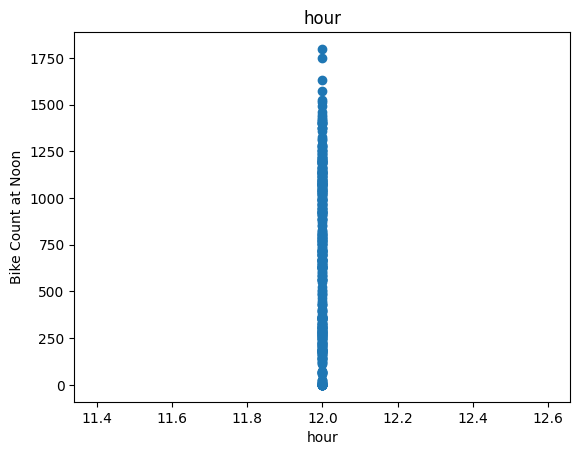

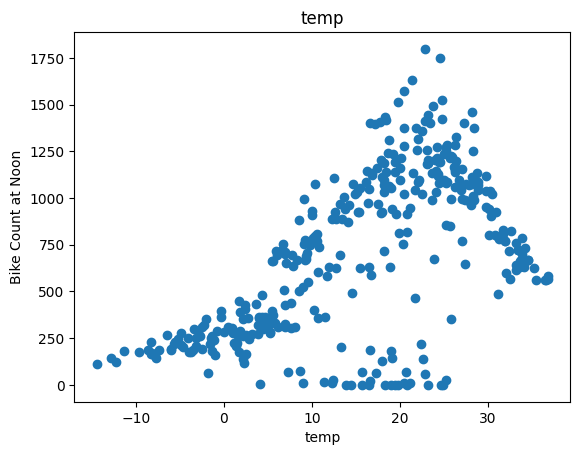

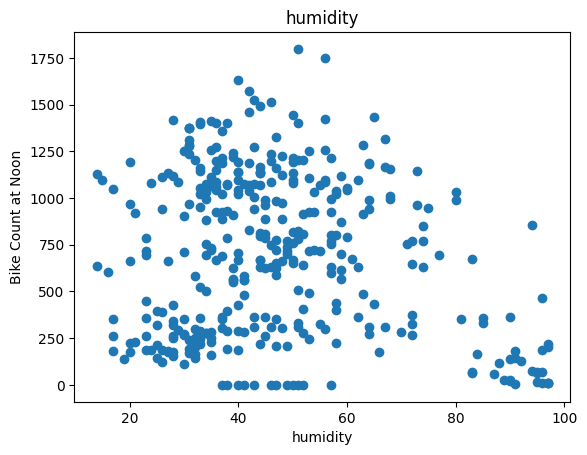

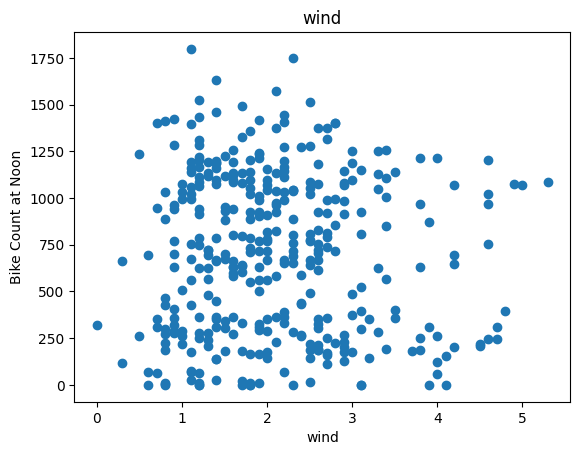

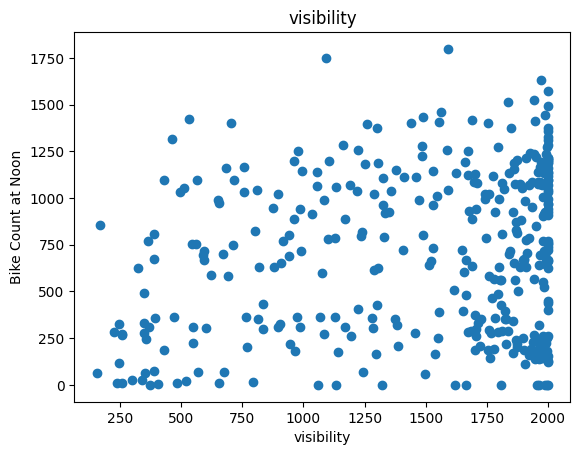

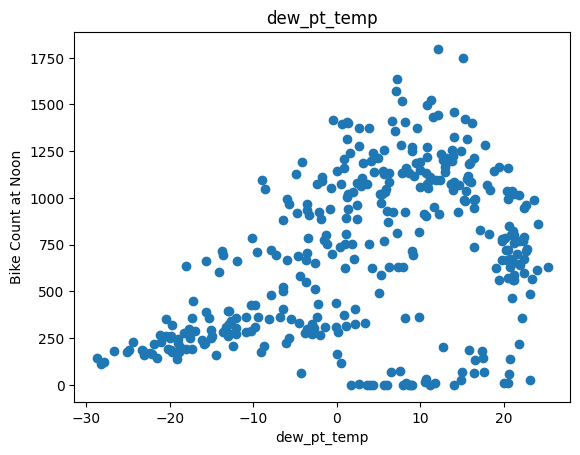

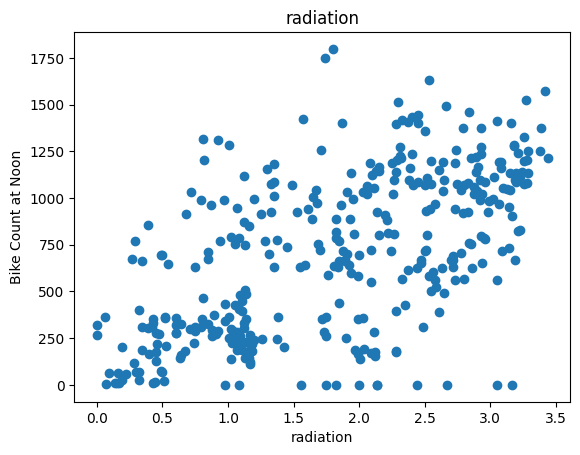

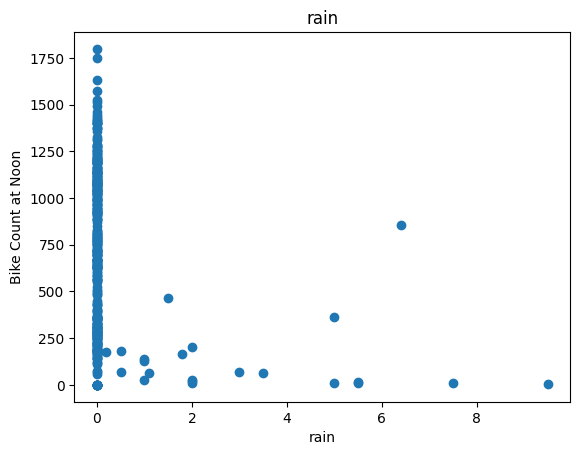

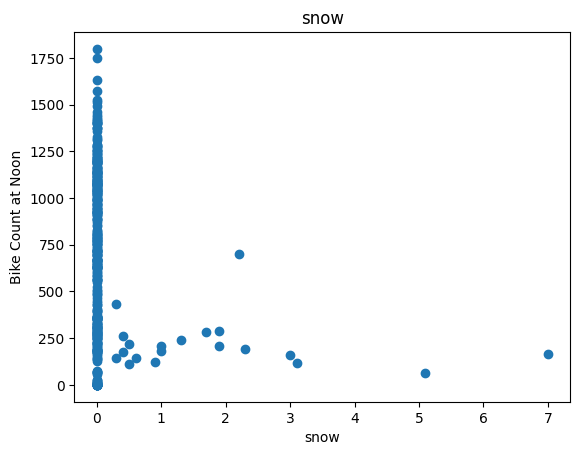

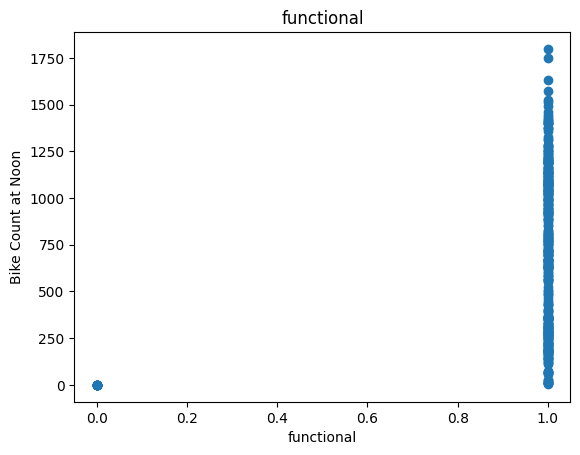

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [9]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [1]:
!pip install ucimlrepo

# Train, Valid and Test Dataset

In [10]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data, X, y

# Simple Linear Regression
- It uses Line of best fit -> $y=b_0 +b_1 x$
- residual/error = $|y_i - y_{i_o}|$
- Measures are sum of errors, sum of spuared errors

# Linear Regression
## Assumptions
1. Linearity -> when y increases x increases or vice versa, We want our datset to follow simple linearity
2. Independence -> all the samples should be independent in the dataset
3. Normality -> Residual plot, Homoskedasticity, they says it should follow normal distribution variance of this points should remain constant throughout, If there is homoskedasticity then it means that data does not support linear regression
## Evaluation
1. Mean Absolute Error , $MAE = \frac{\sum_{n=1}^{k}|y_i - y_{i_o}|}{k}$, Used cause it allows direct comparison
2. Mean Square Error , $MSE = \frac{\sum_{n=1}^{k}|y_i - y_{i_o}|^2}{k}$
3. Root Mean Square Error , $RMSE = \sqrt\frac{\sum_{n=1}^{k}|y_i - y_{i_o}|^2}{k}, $  
Now we can directly compare it to predictor instead of mean square error
4. $R^2 = 1 - \frac{RSS}{TSS}$,  
 Here,  
 RSS = sum of square residuals $\sum_{n=1}^{k}|y_i - y_{i_o}|^2$,  
 TSS = Total sum of squares $\sum_{n=1}^{k}|y_i - y_{mean}|^2$  
 When $R^2$ is towards 1 then it is a good sign it is a good predictor there are more predictors
5. Adjusted $R^2$

In [12]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [ ]:
print(temp_reg.coef_, temp_reg.intercept_)

[[20.8684092]] [350.91430288]


In [ ]:
# R square score
temp_reg.score(X_test_temp, y_test_temp)

0.27094494218320797

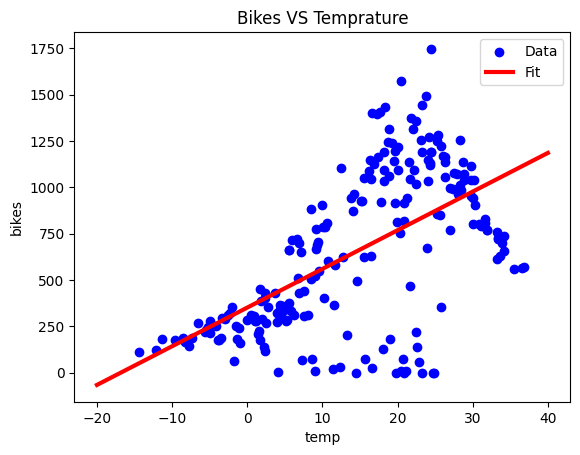

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes VS Temprature")
plt.xlabel("temp")
plt.ylabel("bikes")
plt.show()

# Multiple Linear Regression
- It uses Line of best fit -> $y=b_0 +b_1 x +b_2 x +b_3 x +...$

In [24]:
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [ ]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(X_test_all, y_test_all)

0.34674744628652976

# Linear Regression With Neural Nets

In [13]:
# Create a normalization layer
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error")

In [ ]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

In [17]:
def plot_tf_history(history):
  # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.grid(True)
  plt.show()

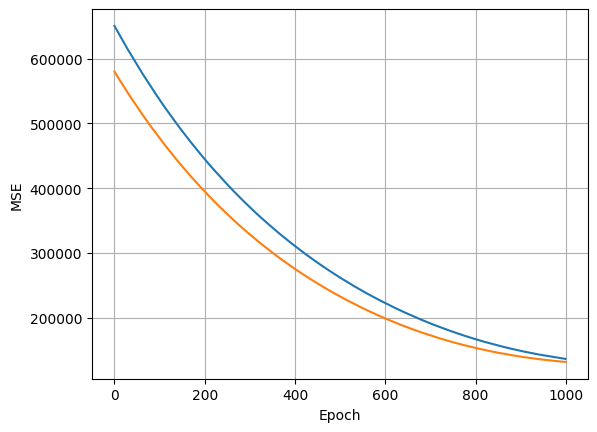

In [ ]:
plot_tf_history(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


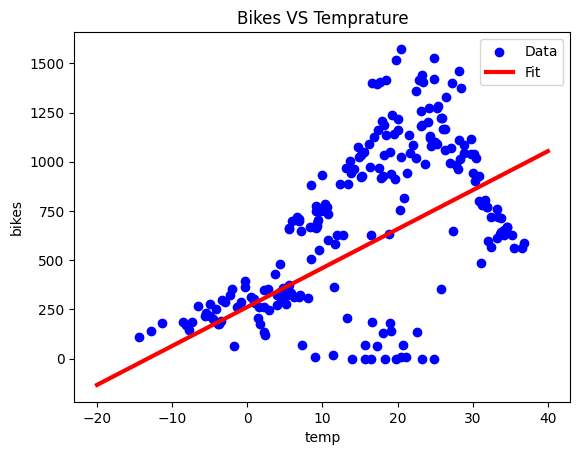

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes VS Temprature")
plt.xlabel("temp")
plt.ylabel("bikes")
plt.show()

# Multiple Linear Regression With Neural Nets

In [47]:
# Create a normalization layer
all_normalizer = tf.keras.layers.Normalization(input_shape=(7,),axis=-1)
all_normalizer.adapt(X_train_all)

In [48]:


all_nn_model = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(6,1)),
    all_normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [49]:
all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error')

In [50]:
history = all_nn_model.fit(
    X_train_all, y_train_all,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_all, y_val_all)
)

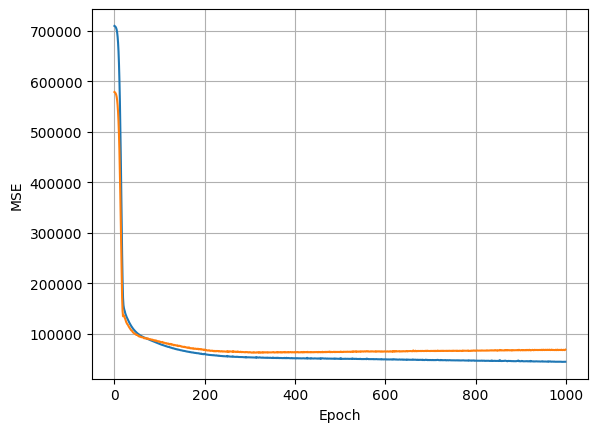

In [51]:
plot_tf_history(history)

ValueError: x and y must be the same size

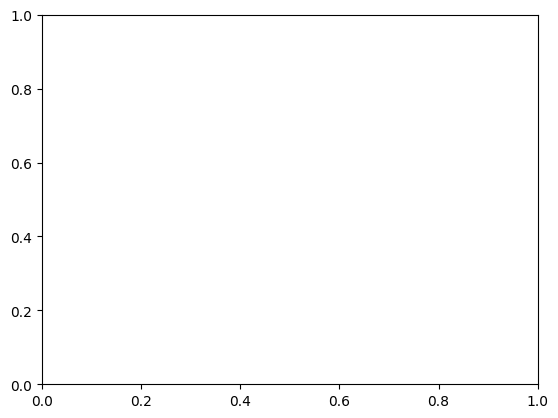

In [54]:
plt.scatter(X_train_all, y_train_all, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, all_nn_model.predict(np.array(x)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes VS Temprature")
plt.xlabel("temp")
plt.ylabel("bikes")
plt.show()

# Neural Networks

In [19]:
# Create a normalization layer
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0,
    epochs=100
)

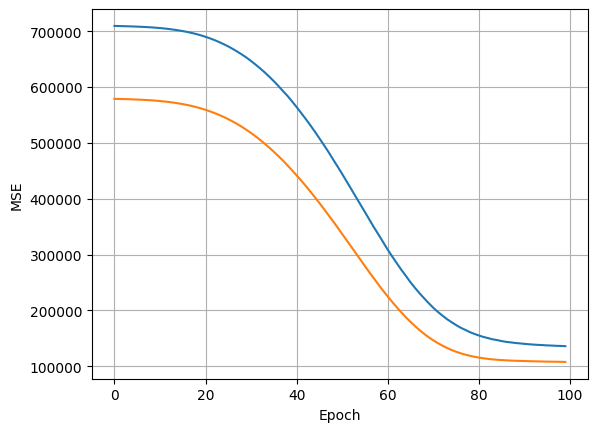

In [21]:
plot_tf_history(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


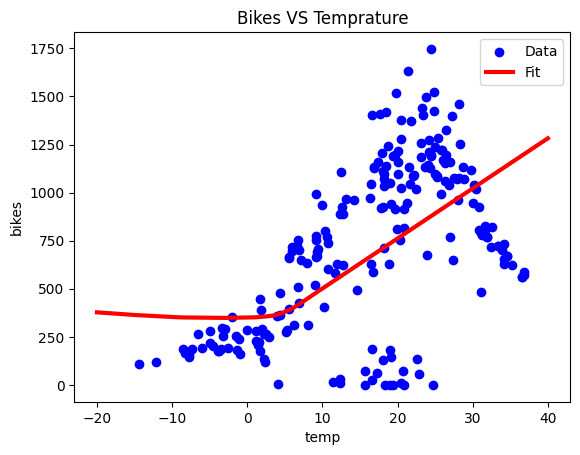

In [22]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes VS Temprature")
plt.xlabel("temp")
plt.ylabel("bikes")
plt.show()